Noah Croes

i6220934

# Data Analysis

# Clinic1: Exploratory Data Analysis

## DELIVERABLES (DEADLINE 21/February late night, wildcards possible)

Instructions for the deliverable: 

* Make sure that you include a proper amount/mix of comments, results and code.

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. Enjoy!

* Honor code applies to these tasks. Only individual work should be submitted.

* Data science is a collaborative activity. While you may talk with others about the clinic, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

* It is mandatory to list and disclose any website (or other resource) you used (e.g. stackoverflow) as well as any genAI tools (e.g. chatGPT) used.

**Collaborators**: *list collaborators here*

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

### Learning goals

By completing and delivering the clinic tasks you will know how to :

* Load files and check their integrity
* Identifying the type of data collected, missing values, anomalies, etc.
* Wrangle data for analysis
* Parse columns in the dataframe to create new dataframe columns
* Use EDA to learn more about your data
* Create and interpret informative visualizations to explore the data set
* Derive meaningful insights for the societal impact of datasets

## 0: Introduction to the Problem

The Product Safety Alerts page (https://ec.europa.eu/safety-gate-alerts/screen/search?resetSearch=true) of the European Commission (EC) serves as a vital resource for consumers, businesses, and authorities across the European Union (EU). This platform provides up-to-date information on products that pose risks to consumers' health and safety, thereby facilitating prompt action to mitigate potential hazards.

Some key features and functions of the Product Safety Alerts page include:

**Alert Notifications**: The page regularly publishes alerts regarding unsafe products circulating within the EU market. These alerts cover a wide range of products, including toys, electrical appliances, cosmetics, and household goods.

**Identification of Risks**: Each alert details the specific risks associated with the identified products, such as potential choking hazards, chemical contamination, or electrical malfunctions.

**Product Details**: The alerts include information about the product brand, model, and description, enabling consumers to identify and avoid purchasing or using the affected items.

**Recommended Actions**: The EC provides guidance on recommended actions for consumers, retailers, and authorities, such as discontinuing product use, recalling items from the market, and implementing corrective measures.

**Reporting Mechanisms**: The page offers convenient reporting mechanisms for consumers and businesses to notify authorities about unsafe products or incidents, facilitating swift response and resolution.

**Archived Alerts**: Previous alerts remain accessible on the page, allowing users to review historical data and trends related to product safety issues within the EU market.

Overall, the Product Safety Alerts page of the EC plays a crucial role in promoting consumer awareness, facilitating product recalls, and safeguarding public health and safety across the European Union. By providing transparent and timely information, this platform empowers stakeholders to take proactive measures to address product safety concerns effectively.

Make sure to navigate the webpage to gather all information you need about the context of the problem and the dataset.

In this clinic, you will perform tasks to clean, visualize, and explore historical data from alerts and come up with insights (as well as with improvements on the data schema). You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

### 0.1 A note on the basic EDA workflow

Before we move to the actual clinic tasks, a reminder about the basic EDA workflow:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

### 0.2 Grading

The clinic is broken down to several sub-questions so that they help you solve the tasks in an iterative way but also to facilitate grading. 

For responses that require numerical answers and some comment/discussion (free response), readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

For plots, you should abide to the basic principles as we have discussed in class. Note that for ALL plotting questions from here on out (also for other clinics), we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?


### Score breakdown per sub-question

Question | Points
--- | ---
Question 1a | 3
Question 1b | 3
Question 1c | 3
Question 2a | 3
Question 2b | 3
Question 3a | 4
Question 3b | 4
Question 4a | 4
Question 4b | 4
Question 5  | 4
Total | 35

Your final score out of 35 will be scaled down to 1 and be your final grade for this clinic.

---
## 1: Data Preparation

The data we are exploring contains 35529 entries which covers (almost) all alerts logged in the safety gate portal since 01/01/2010. For some (rare) categories of products we do have data that go before 2010.

Easter Egg: How many entries does Safety Gate portal has in total? 

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
Type of Alert | Selection of : serious risk, other risk levels, other types of alerts
Type	|	Whether it concerns consumer or professional (e.g. b2b)
Alert number	|	Unique identifier about every alert (it has the structure dddd/yy or Add/ddddd/yy where 'd' means a digit and 'yy' refers to the year that the alert was logged, i.e. 10 means 2010, 22 means 2022) 
Alert submitted by	|	Country that submitted the alert (includes the EU countries + EFTA countries e.g. Iceland)
Country of origin	|	Country of origin for the product
Counterfeit	|	Is the product counterfeit? Selectin of: yes, no, unknown
Risk type	|	What is the possible risk?
Risk legal provision	|	What legal provisions does the product violate?
Product	|	Decsription of product
Name	|	Product name
Description	|	Detailed description of the product functioning
Brand	|	Brand Name
Category	|	Broad category of the product (should include 33 big categories plus category others which can have sub-categories, e.g. Other-Ladder, Other-Clothing Accessories)
Type / number of model	|	Specific serial or number or type 
OECD Portal category	|	Does the product correspond to OECD category?
Risk	|	Detailed description of the risk 
Compulsory measures	|	Measures taken that are compulsory
Voluntary measures	|	Measures taken that are voluntary
Products were found and measures were taken also in	|	In which other countries the product was found. Countries can be listed with ","
Company recall page	|	If the product was recalled, has this been published?
URL of Case	|	URL of the Safety Gate
Barcode	|	The barcode of the product (if applicable)
Batch number	|	Batch number of the product (if applicable)
Packaging description	|	How the items is packaged (e.g. wrapped in plastic etc.) (if applicable)

The following code loads the data into a Pandas ``DataFrame``.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#change accordingly if needed
file_path = 'all_alerts.xlsx'

# Use pd.read_excel() to read the Excel file into a pandas DataFrame.
df = pd.read_excel(file_path)

In [2]:
df.head(10)

,Type of alert,Type,Alert number,Alert submitted by,Country of origin,Counterfeit,Risk type,Risk legal provision,Product,Name,...,OECD Portal category,Risk,Compulsory measures,Voluntary measures,Products were found and measures were taken also in,Company recall page,URL of Case,Barcode,Batch number,Packaging description
0,Serious risk,Consumer,1968/10,Greece,Italy,No,Chemical,NaN,Soother (Physiosoft)\n\n,NaN,...,NaN,The product poses a chemical risk because it c...,Type of economic operator to whom the measure(...,NaN,NaN,NaN,https://ec.europa.eu/safety-gate-alerts/screen...,NaN,NaN,NaN
1,Serious risk,Consumer,1953/10,Germany,People's Republic of China,No,Chemical,NaN,Baby shoes (Baby shoe)\n\n,NaN,...,NaN,The product poses a chemical risk because the ...,Type of economic operator to whom the measure(...,NaN,Slovenia,NaN,https://ec.europa.eu/safety-gate-alerts/screen...,NaN,NaN,NaN
2,Serious risk,Consumer,1946/10,France,People's Republic of China,No,Chemical,NaN,Glue (4 tubes de colle cyanocrylate 2g)\n\n,NaN,...,NaN,The product poses a chemical risk because it c...,NaN,Type of economic operator taking notified meas...,NaN,NaN,https://ec.europa.eu/safety-gate-alerts/screen...,NaN,NaN,NaN
3,Serious risk,Consumer,1945/10,Bulgaria,Türkiye,No,Injuries,NaN,Baby-walker (Discovery)\n\n,NaN,...,NaN,The product poses a risk of injuries to small ...,Type of economic operator to whom the measure(...,NaN,NaN,NaN,https://ec.europa.eu/safety-gate-alerts/screen...,NaN,NaN,NaN
4,Serious risk,Consumer,1888/10,Belgium,The Netherlands,No,Injuries,NaN,High chair,NaN,...,NaN,The product poses a risk of injuries because t...,NaN,Type of economic operator taking notified meas...,The Netherlands,NaN,https://ec.europa.eu/safety-gate-alerts/screen...,NaN,NaN,NaN
5,Serious risk,Consumer,1884/10,Sweden,Sweden,No,Injuries,NaN,Pushchair - Brio Duette\n\n,NaN,...,NaN,The product poses a risk of injuries because t...,NaN,Type of economic operator taking notified meas...,Norway,NaN,https://ec.europa.eu/safety-gate-alerts/screen...,NaN,NaN,NaN
6,Serious risk,Consumer,1848/10,Czechia,Poland,No,"Chemical, Injuries",NaN,Pram - Fast Rider,NaN,...,NaN,The product poses a risk of injuries due to th...,Type of economic operator to whom the measure(...,NaN,NaN,NaN,https://ec.europa.eu/safety-gate-alerts/screen...,NaN,NaN,NaN
7,Serious risk,Consumer,1847/10,Spain,People's Republic of China,No,Chemical,NaN,Air freshener\n\n,NaN,...,NaN,The product poses a chemical risk because it c...,Type of economic operator to whom the measure(...,NaN,NaN,NaN,https://ec.europa.eu/safety-gate-alerts/screen...,843085207670007670\n\n,NaN,NaN
8,Serious risk,Consumer,1842/10,Greece,People's Republic of China,No,"Choking, Injuries",NaN,Baby walker,NaN,...,NaN,The product poses a risk of choking due to the...,Type of economic operator to whom the measure(...,NaN,NaN,NaN,https://ec.europa.eu/safety-gate-alerts/screen...,NaN,NaN,NaN
9,Serious risk,Consumer,1833/10,Finland,People's Republic of China,No,Chemical,NaN,"1. Nursing pillow, 2. Crib bumper\n\n",NaN,...,NaN,The products pose a chemical risk and an envir...,NaN,Type of economic operator taking notified meas...,NaN,NaN,https://ec.europa.eu/safety-gate-alerts/screen...,NaN,NaN,NaN


Below, we show the shape of the file. You should see that the size of the DataFrame matches the number of lines in the file, minus the header row.

In [3]:
df.shape

(35529, 24)

## Question 1a (First observations)

Develop a feeling for the dataset. Check how many variables we have, what type of variables they are (quantitative/categorical).

Inspect the following variables: ``Type of alert``, ``Alert submitted by``, ``Risk type``, ``Counterfeit``, ``Company recall page`` and check their distributions. Report your findings both with a plot but also with numbers/verbal evidence (e.g. "99% of column "X" contain the value "Jerry"", accompanied with an appropriate plot).

Do the same procedure for 3 more variables of your choice. Pick variables that are interesting in your opinion.

In [4]:
###code for 1a goes here
%matplotlib inline

columns_to_inspect = ["Type of alert", "Alert submitted by", "Risk type", "Counterfeit", "Company recall page", "Country of origin", "Product", "Brand"]

df_inspected_variables = df[columns_to_inspect]
df_inspected_variables.head(20)

,Type of alert,Alert submitted by,Risk type,Counterfeit,Company recall page,Country of origin,Product,Brand
0,Serious risk,Greece,Chemical,No,NaN,Italy,Soother (Physiosoft)\n\n,Chicco\n\n
1,Serious risk,Germany,Chemical,No,NaN,People's Republic of China,Baby shoes (Baby shoe)\n\n,NKD\n\n
2,Serious risk,France,Chemical,No,NaN,People's Republic of China,Glue (4 tubes de colle cyanocrylate 2g)\n\n,Bricoteam\n\n
3,Serious risk,Bulgaria,Injuries,No,NaN,Türkiye,Baby-walker (Discovery)\n\n,Casaul\n\n
4,Serious risk,Belgium,Injuries,No,NaN,The Netherlands,High chair,Topmark Desert T 2090
5,Serious risk,Sweden,Injuries,No,NaN,Sweden,Pushchair - Brio Duette\n\n,Brio\n\n
6,Serious risk,Czechia,"Chemical, Injuries",No,NaN,Poland,Pram - Fast Rider,Tako
7,Serious risk,Spain,Chemical,No,NaN,People's Republic of China,Air freshener\n\n,Crystal Air Freshener Series\n\n
8,Serious risk,Greece,"Choking, Injuries",No,NaN,People's Republic of China,Baby walker,Junior
9,Serious risk,Finland,Chemical,No,NaN,People's Republic of China,"1. Nursing pillow, 2. Crib bumper\n\n",Trold & Co.\n\n


In [5]:

for column in df_inspected_variables.columns:
    df_column = df_inspected_variables[column]
    print("Unique value counts within \""+column+"\": "+str(len(df_column.unique())))
    print("Frequency normalized of column: "+str(100*df_column.value_counts().head()/df_column.value_counts().sum()))
    print("Non-empty answers: "+str(df_column.value_counts().sum()))
    print()


Unique value counts within "Type of alert": 3
Frequency normalized of column: Type of alert
Serious risk             94.807059
Other risk levels         3.476034
Other types of alerts     1.716907
Name: count, dtype: float64
Non-empty answers: 35529

Unique value counts within "Alert submitted by": 32
Frequency normalized of column: Alert submitted by
Germany           14.889245
Hungary            9.659715
France             7.016803
Spain              6.909848
United Kingdom     5.361817
Name: count, dtype: float64
Non-empty answers: 35529

Unique value counts within "Risk type": 219
Frequency normalized of column: Risk type
Chemical          25.151993
Injuries          22.492119
Choking           11.019478
Electric shock     9.372889
Strangulation      4.438753
Name: count, dtype: float64
Non-empty answers: 35528

Unique value counts within "Counterfeit": 3
Frequency normalized of column: Counterfeit
No         58.155310
Unknown    41.340876
Yes         0.503814
Name: count, dtype: f

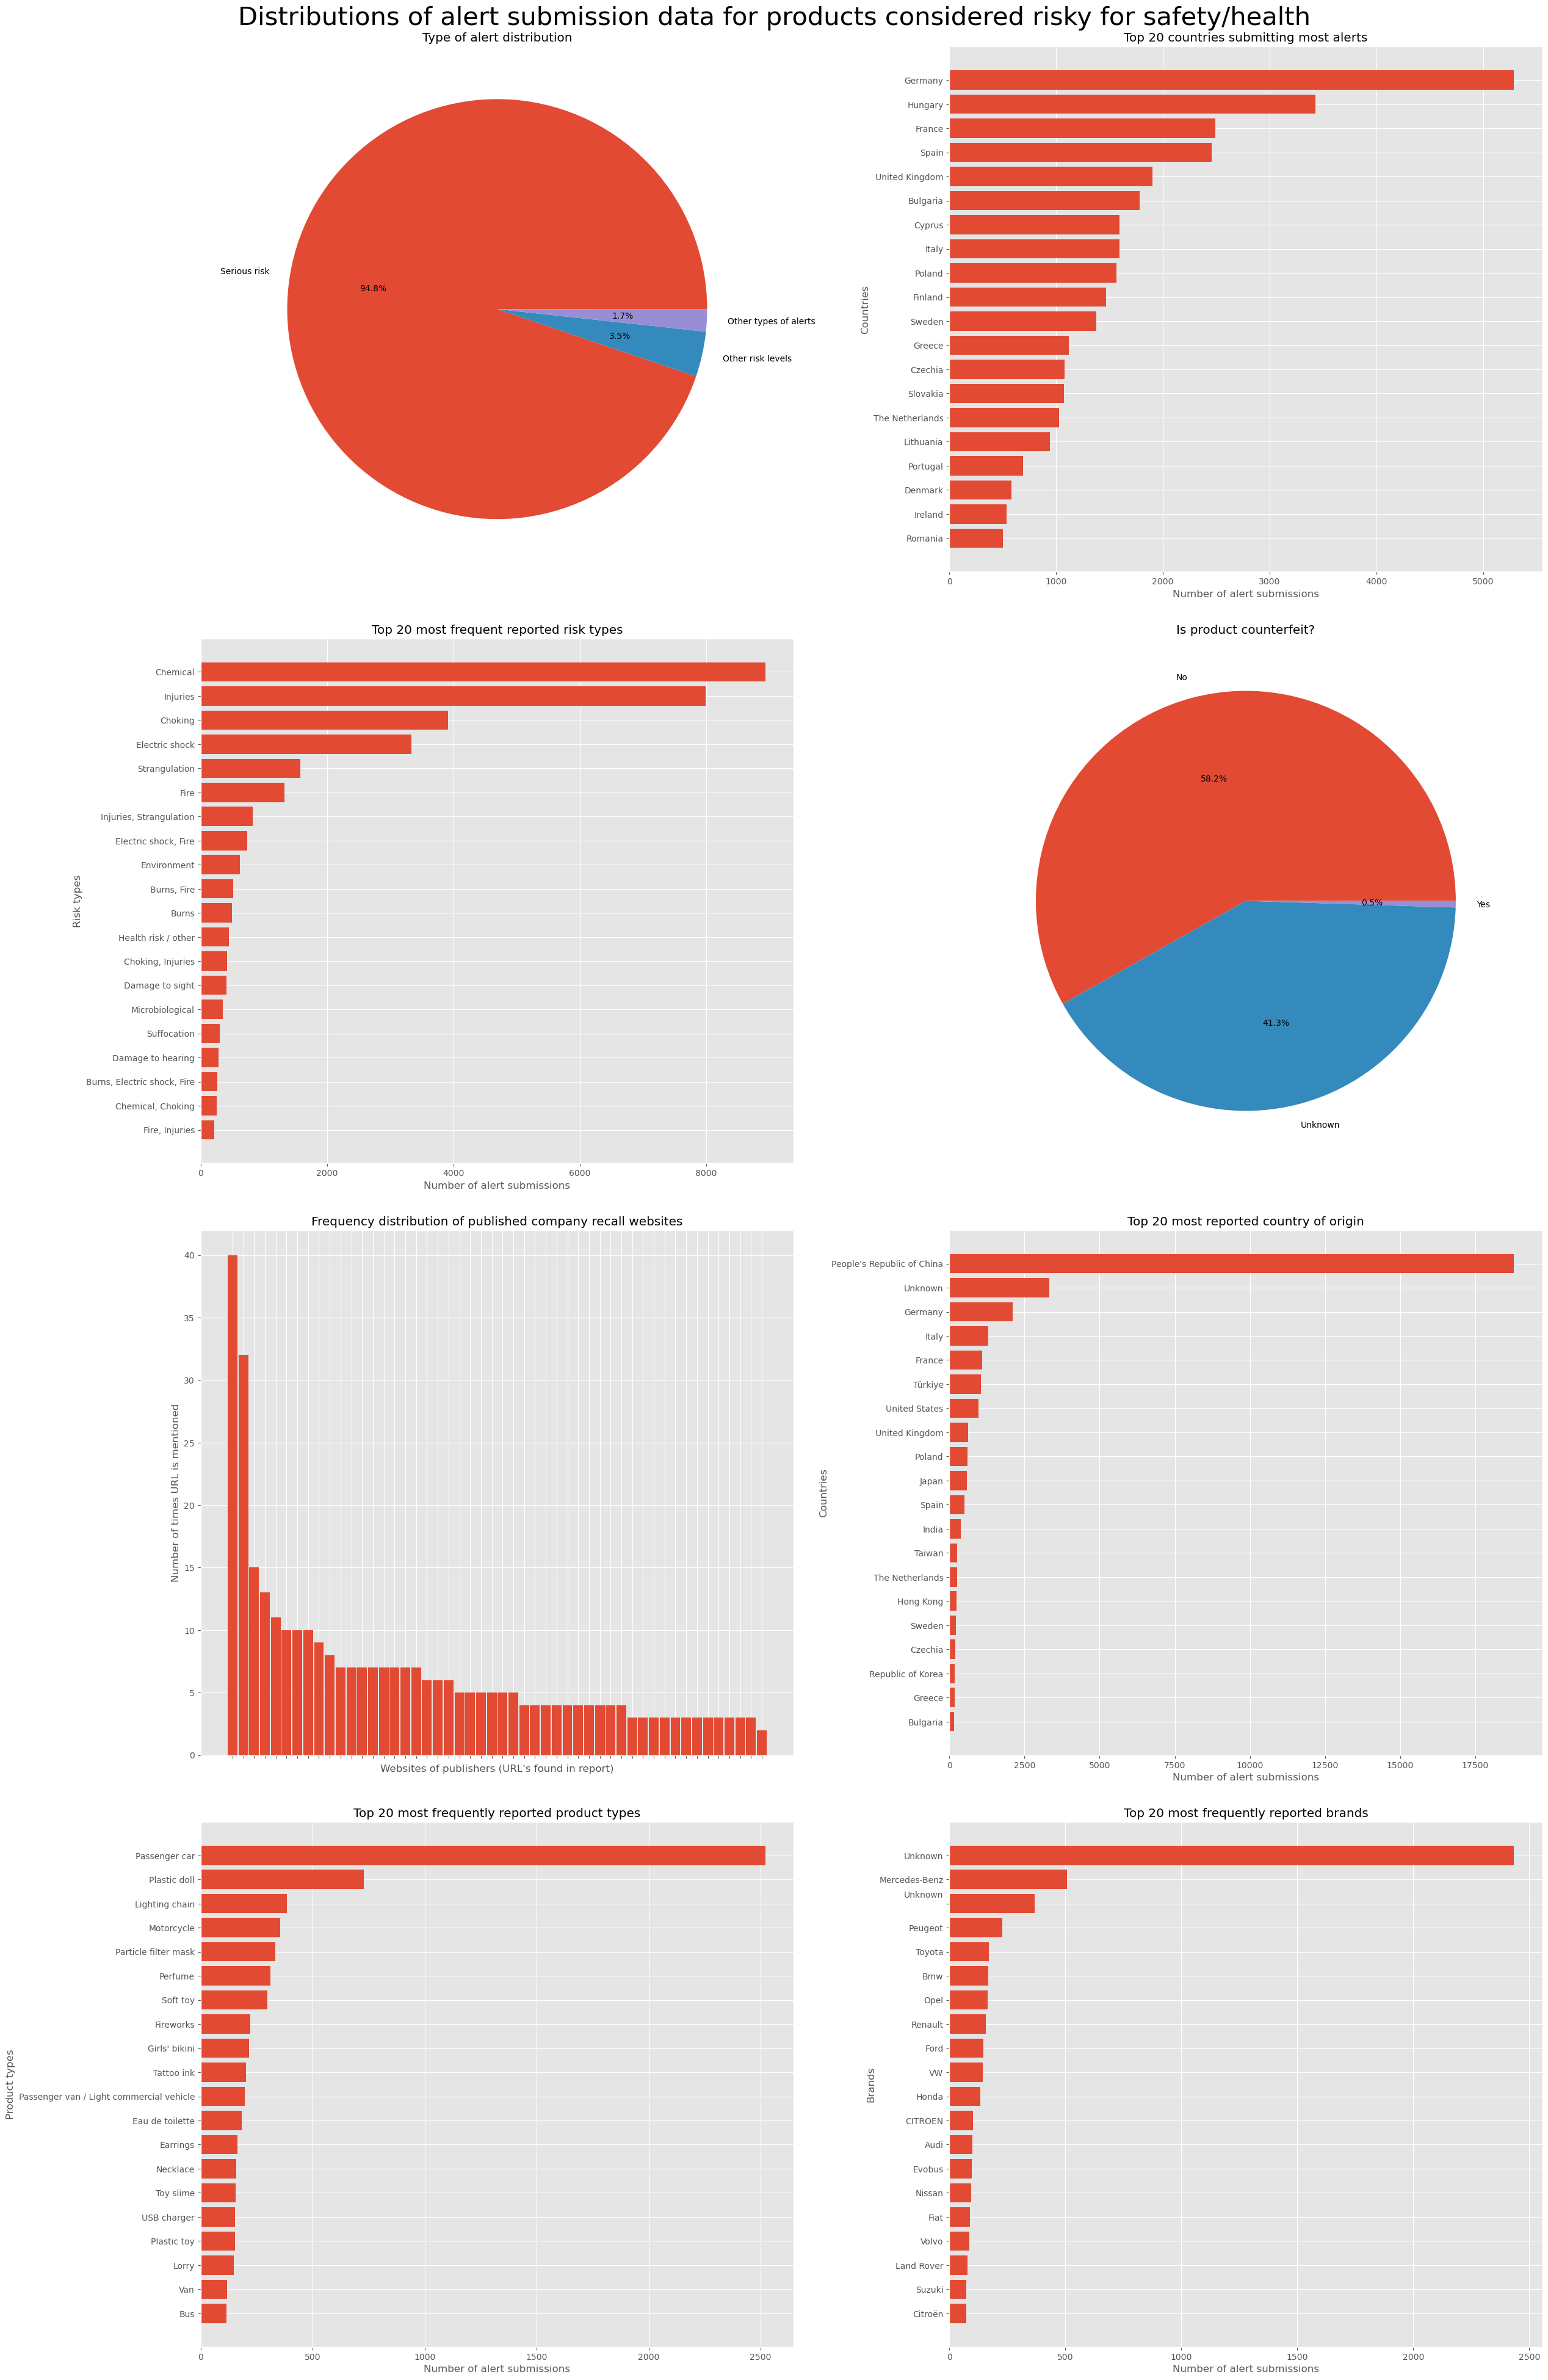

In [6]:
def inspected_variables_distributions():
    
    plt.style.use('ggplot')

    fig, subfigs = plt.subplots(4, 2, figsize=(26, 40))
    


    #Plot distribution of alert_counts using bar because of 3 possible answers
    alert_counts = df_inspected_variables["Type of alert"].value_counts()
    subfigs[0,0].pie(alert_counts.values, labels=alert_counts.index, autopct='%1.1f%%')
    subfigs[0,0].set_title("Type of alert distribution")

    #Plot distribution of alert_submitted_by using barh because of the large amount of categorical data values for different countries
    alert_submitted_by = df_inspected_variables["Alert submitted by"].value_counts().sort_values(ascending=False).head(20)
    subfigs[0,1].barh(alert_submitted_by.index, alert_submitted_by.values)
    subfigs[0,1].invert_yaxis()
    subfigs[0,1].set_title("Top 20 countries submitting most alerts")
    subfigs[0,1].set_xlabel('Number of alert submissions')
    subfigs[0,1].set_ylabel('Countries')

    #Plot distribution of risk_type using barh because of the large amount of categorical data values for different countries
    risk_type = df_inspected_variables["Risk type"].value_counts().sort_values(ascending=False).head(20)
    subfigs[1,0].barh(risk_type.index, risk_type.values)
    subfigs[1,0].invert_yaxis()
    subfigs[1,0].set_title("Top 20 most frequent reported risk types")
    subfigs[1,0].set_xlabel('Number of alert submissions')
    subfigs[1,0].set_ylabel('Risk types')

    #Plot distribution of counterfeit using pie because of 3 possible answers
    counterfeit = df_inspected_variables["Counterfeit"].value_counts().sort_values(ascending=False)
    subfigs[1,1].pie(counterfeit.values, labels=counterfeit.index, autopct='%1.1f%%')
    subfigs[1,1].set_title("Is product counterfeit?")

    #Plot distribution of company recall page using bar because of few repeated categorical data (distribution will have a very long tail)
    company_recall_page = df_inspected_variables["Company recall page"].value_counts().sort_values(ascending=False).head(50)
    subfigs[2,0].bar(company_recall_page.index, company_recall_page.values, width=0.9)
    subfigs[2,0].set_title("Frequency distribution of published company recall websites")
    subfigs[2,0].set_xticklabels([])
    subfigs[2,0].set_xlabel('Websites of publishers (URL\'s found in report)')
    subfigs[2,0].set_ylabel('Number of times URL is mentioned')
    
    #Plot distribution of country of origin using 
    country_of_origin = df_inspected_variables["Country of origin"].value_counts().sort_values(ascending=False).head(20)
    subfigs[2,1].barh(country_of_origin.index, country_of_origin.values)
    subfigs[2,1].invert_yaxis()
    subfigs[2,1].set_title("Top 20 most reported country of origin")
    subfigs[2,1].set_xlabel('Number of alert submissions')
    subfigs[2,1].set_ylabel('Countries')

    #Plot distribution of product types
    product = df_inspected_variables["Product"].value_counts().sort_values(ascending=False).head(20)
    subfigs[3,0].barh(product.index, product.values)
    subfigs[3,0].invert_yaxis()
    subfigs[3,0].set_title("Top 20 most frequently reported product types")
    subfigs[3,0].set_xlabel('Number of alert submissions')
    subfigs[3,0].set_ylabel('Product types')

    #Plot distribution of reported brands
    brand = df_inspected_variables["Brand"].value_counts().sort_values(ascending=False).head(20)
    subfigs[3,1].barh(brand.index, brand.values)
    subfigs[3,1].invert_yaxis()
    subfigs[3,1].set_title("Top 20 most frequently reported brands")
    subfigs[3,1].set_xlabel('Number of alert submissions')
    subfigs[3,1].set_ylabel('Brands')

    fig.suptitle('Distributions of alert submission data for products considered risky for safety/health', fontsize=30)
    fig.tight_layout(pad=3)
    plt.show()

inspected_variables_distributions()


In [7]:
for column in df_inspected_variables.columns:
    df_column = df_inspected_variables[column].value_counts()
    print("Frequency of column: "+str(df_column.head()))
    print("Mean = "+str(df_column.mean()), "Median = "+str(df_column.median()), "SD = "+str(df_column.std()), "Min = "+str(df_column.min()), "Max = "+str(df_column.max()),  sep=", ")
    print("Non-empty answers: "+str(df_column.sum()))
    print()

Frequency of column: Type of alert
Serious risk             33684
Other risk levels         1235
Other types of alerts      610
Name: count, dtype: int64
Mean = 11843.0, Median = 1235.0, SD = 18917.442136821774, Min = 610, Max = 33684
Non-empty answers: 35529

Frequency of column: Alert submitted by
Germany           5290
Hungary           3432
France            2493
Spain             2455
United Kingdom    1905
Name: count, dtype: int64
Mean = 1110.28125, Median = 815.5, SD = 1119.0571559785383, Min = 1, Max = 5290
Non-empty answers: 35529

Frequency of column: Risk type
Chemical          8936
Injuries          7991
Choking           3915
Electric shock    3330
Strangulation     1577
Name: count, dtype: int64
Mean = 162.9724770642202, Median = 3.0, SD = 890.0530606946392, Min = 1, Max = 8936
Non-empty answers: 35528

Frequency of column: Counterfeit
No         20662
Unknown    14688
Yes          179
Name: count, dtype: int64
Mean = 11843.0, Median = 14688.0, SD = 10533.700252048186, M

#### Type of alert
Within the type of alerts we can observe within the chart that the majority (94.8%) of all alerts refer to serious risk cases.

#### Alert submitted by
It seems that Germany is responsible for about 14.9%, and Hungary 9.7% of the total amount of alerts submitted. 

#### Risk type
The top two most frequently reported risk types take up almost half of the entire dataset. Around 25.2% of the risks are of the type "chemical" and 22.5% of type "injuries".

#### Counterfeit
Interestingly enough most products are either not a counterfeit or it is unknown whether they are or not. One would think that there would be many counterfeit (illegally produced kockoffs) included that have faulty production quality due to them being illegal, but the certain "yes" answers include only 0.5% of all the answers. 

#### Company recall page
It seems that around 3.4% of the recalls that are published come from a french website for alerting dangerous products. This is also in line with the fact that France is ranked number 3 in "Alert submitted by" by counts.

#### Country of origin
China doesn't particularly have the best reputation with regards to producing quality products. It comes to no suprise they are also responsible for producing around 52.9% of the products that were reported. However, we have to take into consideration the fact that china is the largest manufacturing country in the world by far. 

#### Product
Passenger cars are by far the most reported product types reported, but these only account for about 7.4% of the non-empty data.

#### Brand
In line with the previous observation, out of the non-empty answers it is mercedez-benz (a car manufacturer) that comes out as second most reported brand (unknown is first) at around 1.6%. There are also other names like Peugeot (0.7%) and Toyota (0.5%)

## Question 1b (Getting the year)

The granularity of the dataset is on the individual alerts level. For each alert, we can extract the year that was submitted by inspecting the ``Alert number`` field. There are different formats there, but the last two digits after the last slash (``"/"``) always give you the year that alert was submitted.

e.g. 

``0574/09`` means that the alert was submitted in 2009

``A12/1716/13`` means that the alert was submitted in 2013.


Using the information above, make a relevant function to extract the year, apply it on the ``Alert number`` column and store it on a new column in the original dataframe called ``Year``. We will use this later.

Before proceeding, double check that the calculation is correct for all rows. Report any irregularities.

Note that while the majority of the alerts is after 2010, there might be some categories (the most rare ones) that data span before 2010.

In [8]:
###code for 1b goes here

def year_extractor(input_df: pd.DataFrame, column_name:str="Alert number"):
    input_df["Year"] = [x.split("/")[-1] for x in input_df[column_name]]

year_extractor(df)

print("Instances where length is not equal to 2")
print(df.loc[df["Year"].apply(lambda x: len(x) != 2), 'Year'])
#df.loc[df["Year"].apply(lambda x: len(x) != 2), 'Year'] = pd.NA



print()
print("Instances where there are non-digit characters")
print(df.loc[df["Year"].str.contains('\D', na=False),'Year'])
#df.loc[df["Year"].str.contains('\D', na=False),'Year'] = pd.NA

Instances where length is not equal to 2
2276     0559.11
7086         10.
11684        087
11688        081
15136        08 
15137        08 
30336          >
31028        084
Name: Year, dtype: object

Instances where there are non-digit characters
2276     0559.11
7086         10.
15136        08 
15137        08 
30336          >
Name: Year, dtype: object


In these cases it is not known what is meant by their values. The set of instances where there are non-digit characters is a subset of the set where the length is not equal to 2. Since these are very few items, we can investigate them by hand to correct the values. It seems that we can fix them all by either visiting the website of the reports or by removing punctuations, spaces, breaks, or special characters. 

In [9]:
df.loc[2276,'Year'] = '11'
df.loc[7086,'Year'] = '10'
df.loc[11684,'Year'] = '08'
df.loc[11688,'Year'] = '08'
df.loc[15136,'Year'] = '08'
df.loc[15137,'Year'] = '08'
df.loc[30336,'Year'] = '09'
df.loc[31028,'Year'] = '08'

print("Instances where length is not equal to 2")
print(df.loc[df["Year"].apply(lambda x: len(x) != 2), 'Year'] if df["Year"].apply(lambda x: len(str(x)) != 2).any() else "There are no instances where the length is not equal to 2")

Instances where length is not equal to 2
There are no instances where the length is not equal to 2


## Question 1c (Identifying issues with the data)

Inspect the variables (based on the codebook) and identify potential issues with one (or more) of them. You don't need to do this for all variables in the dataset, but pick a handful of interesting ones (e.g. feel free to ignore most text fields (e.g. legal provisions, compulsory measures, voluntary measures) or irrelevant ones for our analysis (e.g. batch number). Think about missing values, mistakes, outliers, errors etc. Provide possible (and plausible) explanations for the missing data. Correct these and justify your answers accordingly.

#### Brands
Frequently reported brands seems to have variations of the term "unknown". Apparently there are terms that are "unknown" and "unknown\n\n". the latter acocount for quite a large portion of the data set. We could merge all brands that have the term "unknown" in it (capitalized or not). Terms like "unknown1" and "4unknown302" would then also be merged, which is desired. In addition, a brand like "Citroen" is represented as "CITROEN" and also as "Citroën". We can definitely remove diacritics for brand names, since often these are left out anyway within reports or normal day emails/texts. It will still be obvious what brand name is meant.

Because we converted cells within our ``Brand`` column to unicode data and normalized them all the empty cells are now explicit 'nan' strings. Since these values are also unknown, we can simply set them to 'unknown' as well. 

After applying these fixes we can see that 19.5% of the data is unknown. To get a better visualization and idea of what brands are represented we dont display this in the new plot. Mercedes dropped to 1.4% due to us also taking into consideration nan values. 

example: rolf
Brand
unknown          19.499564
mercedes-benz     1.424189
peugeot           0.644544
citroen           0.526331
bmw               0.523516
toyota            0.481297
opel              0.470039
renault           0.447522
ford              0.422190
vw                0.402488
honda             0.385600
audi              0.275831
evobus            0.270202
nissan            0.267387
fiat              0.250500
volvo             0.247685
land rover        0.225168
suzuki            0.211095
mitsubishi        0.202651
intenze           0.202651
eternal ink       0.194208
yamaha            0.188578
jeep              0.188578
hyundai           0.182949
mazda             0.180135
porsche           0.171691
dodge             0.163247
jaguar            0.160432
polaris           0.154803
jumbo             0.135101
Name: count, dtype: float64
Value counts sum: 35529


Text(0, 0.5, 'Brands')

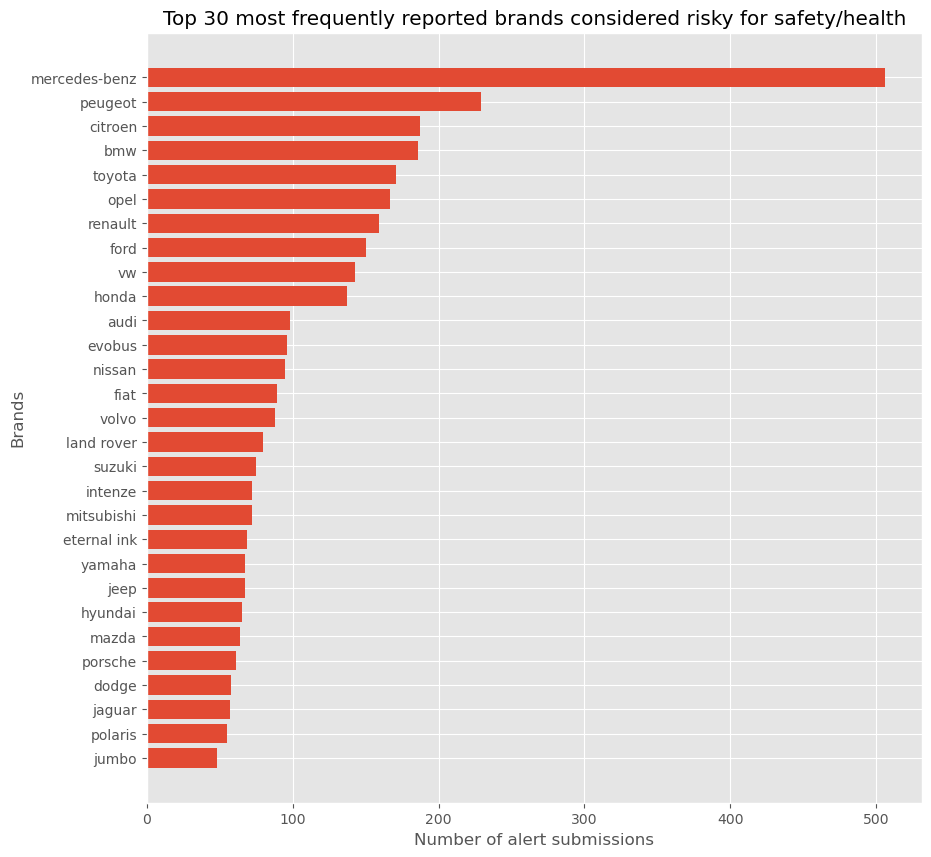

In [10]:
###code for 1c goes here
import unicodedata

# merging unknown terms
df['Brand'] = df['Brand'].astype(str)
df['Brand'] = df['Brand'].apply(lambda x: 'unknown' if 'unknown' in x.lower() else x)

# removing diacritics by using unicode data of the input string
def remove_diacritics(input_str:str):
    input_str = input_str.lower()
    nfkd_format = unicodedata.normalize('NFKD', input_str)
    new_string = ""
    return new_string.join([c for c in nfkd_format if not unicodedata.combining(c)])

# example
print("example: "+remove_diacritics('Rölf'))

# applying the method to all instances within the column
df['Brand'] = df['Brand'].apply(remove_diacritics)

# Also setting nan to unknown
df['Brand'] = df['Brand'].apply(lambda x: 'unknown' if 'nan' in x.lower() else x)

# new stats
print(100*df['Brand'].value_counts().head(30)/df['Brand'].value_counts().sum())

# Sum of value counts should be equal to the amount of reports 35529
print("Value counts sum: "+ str(df['Brand'].value_counts().sum()))

# Show new distribution without the unknowns
brand = df["Brand"].value_counts().sort_values(ascending=False).head(30)[1:]
fig = plt.figure(figsize=(10, 10))
my_plot = fig.add_subplot(1,1,1)
my_plot.barh(brand.index, brand.values)
my_plot.invert_yaxis()
my_plot.set_title("Top 30 most frequently reported brands considered risky for safety/health")
my_plot.set_xlabel("Number of alert submissions")
my_plot.set_ylabel("Brands")



#### Company Recall Page
Considering the high proportion of missing data we have to consider if this column is critical for the analysis, depending on what we want to do with it. There is also a lot of potential for mistakes and outdated information, since these are URL's. The same publisher might have published something, but if they changed their domain slightly or if its from a dutch extension (NL) instead of from a german extension (DE), then we suddenly have two instances of the same publisher. If the publisher is large enough operating in different countries this can become a problem.

#### Product
Similarly to the ``Brand``, the ``Product`` column has some instances with '\n\n' characters. We can also remove other kinds of special characters like dashes and brackets. We can clean this data using a new method ``remove_special_characters``, also cleaning up diacritics and lowercasing all. For products it is not important to have special characters. 

Text(0, 0.5, 'Product types')

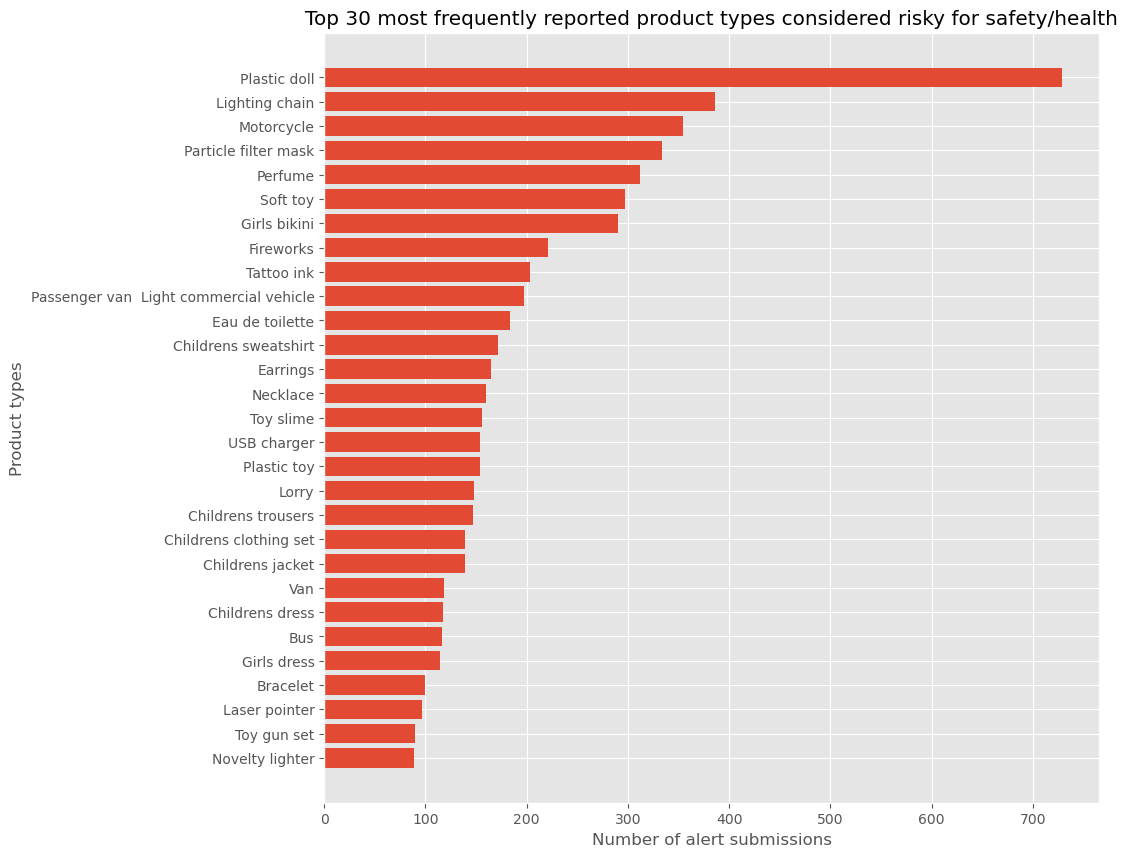

In [11]:
import re
# method for removing special characters
def remove_special_characters(input_str:str):
    cleaned_str = re.sub(r'[^\w\s]', '', input_str)
    return cleaned_str

# applying the method to all instances within the column
df['Product'] = df['Product'].astype(str)
df['Product'] = df['Product'].apply(remove_special_characters)
df['Product'] = df['Product'].apply(lambda x: pd.NA if 'na' in x.lower() else x)


# Show new distribution without the diacritics,\n, and lowercasing everything
product = df["Product"].value_counts().sort_values(ascending=False).head(30)[1:]
fig = plt.figure(figsize=(10, 10))
my_plot = fig.add_subplot(1,1,1)
my_plot.barh(product.index, product.values)
my_plot.invert_yaxis()
my_plot.set_title("Top 30 most frequently reported product types considered risky for safety/health")
my_plot.set_xlabel("Number of alert submissions")
my_plot.set_ylabel("Product types")

---
## 2: Exploring the Distribution of Alerts 

The granularity of this dataset is on the individual alerts level. In the following, we are going to investigate different aggregation levels (e.g. notifying country, type of risk etc.). The following questions require some heavy plotting. Below we are summarizing some functions (should be updated on the latest versions). 

### Matplotlib and Seaborn Table of Common Functions

`x` and `y` are sequences of values (i.e. arrays, lists, or Series).

| Function | Description |
| -------- | ----------- |
| `plt.plot(x, y)` | Creates a line plot of `x` against `y` |
| `plt.title(name)` | Adds a title `name` to the current plot |
| `plt.xlabel(name)` | Adds a label `name` to the x-axis |
| `plt.ylabel(name)` | Adds a label `name` to the y-axis |
| `plt.scatter(x, y)` | Creates a scatter plot of `x` against `y` |
| `plt.hist(x, bins=None)` | Creates a histogram of `x`; `bins` can be an integer or a sequence |
| `plt.bar(x, height)` | Creates a bar plot of categories `x` and corresponding heights `height` |
| `sns.histplot(data, x, y, hue, kde)` | Creates a distribution plot; `data` is a DataFrame; `x`, `y` are column names in `data` that specify positions on the x and y axes; `hue` is a column name in `data` that adds subcategories to the plot based on `hue`; `kde` is a boolean that determines whether to overlay a KDE curve |
|`sns.lineplot(data, x, y, hue)` | Creates a line plot |
|`sns.scatterplot(data, x, y, hue, size)` | Creates a scatter plot; `size` is a vector that contains the size of point for each subcategory based on `hue` |
|`sns.kdeplot(x, y)` |  Creates a kernel density estimate plot; `x`, `y` are series of data that indicate positions on the `x` and `y` axis |
|`sns.jointplot(x, y, data, kind)` | Creates a joint plot of 2 variables with KDE plot in the middle and a distribution plot for each variable on the sides; `kind` determines the visualization type for the distribution plot, can be `scatter`, `kde` or `hist` |

**Note**: This list of functions and parameters is **not** exhaustive. You may need to reference and explore more documentation to answer the following questions, but we will help you through that process. 

## Question 2a

We will first plot the evolution of the total number of alerts over the years. For this reason we are going to use the ``Year`` column you added earlier (Question 1b) to the dataframe.

**Hint**: You can use `groupby` and `agg`. For the `agg` method, please check the [documentation](https://pandas.pydata.org/docs/reference/groupby.html) for examples on applying different aggregations per column. If you use the capability to do different aggregations by column, you can do this task with a single call to `groupby` and `agg`. Take a look at the `'first'` or `'last'` aggregation functions.

Your plot should be a lineplot. Include a legend, xlabel, ylabel, and title. Read the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to add these.

In [12]:
#code for 2a goes here
df['Year'] = df['Year'].astype(int)
grouped_by_year = df.groupby("Year")

print(grouped_by_year.groups)
year_counts = grouped_by_year.agg('size')

year_counts_df = year_counts.to_frame(name="Number of alerts")
print()
print(year_counts_df)

{1: [15716], 4: [7748, 12076, 15613, 15614, 15615, 15616, 15617, 15618, 15619, 15620, 15621, 15622, 23806, 31813, 31814, 31815, 31816, 31817], 5: [481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 7738, 7739, 7740, 7741, 7742, 7743, 7744, 7745, 7746, 7747, 7749, 7750, 7751, 7752, 7753, 7754, 7755, 7756, 7757, 7758, 7759, 7760, 7761, 7762, 7763, 7764, 7765, 7766, 7767, 7768, 7769, 7770, 7771, 7772, 7773, 7774, 7775, 7776, 7777, 7778, 7779, 7780, 7781, 7782, 7783, 7784, ...], 6: [423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 7619, 7

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Number of reports for products considered risky for safety/health per year')]

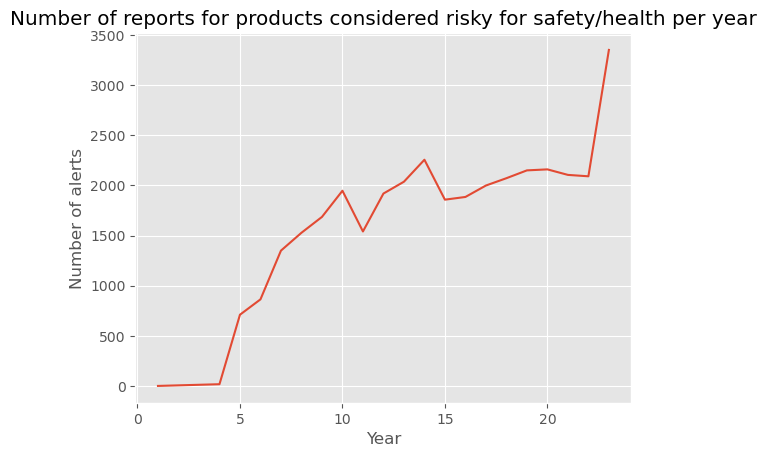

In [13]:
sns.lineplot(data=year_counts_df,x='Year',y='Number of alerts').set(title='Number of reports for products considered risky for safety/health per year')

*** fancy answer goes here ***

## Question 2b

Now we are going to investigate two interesting plots:

The first one, should plot the top-5 product categories (``Category``) per year.

The second one, should plot the top-5 risk types (``Risk type``) per year.

Advice:
- Note that year is a quantitative variable, however both ``Category`` and ``Risk type`` are categorical, therefore pay attention to the type of plot(s) you are going to use here.
- If the plot becomes too crowded, feel free to plot only the recent x years (where x is left to your critical decision making).
- Make sure to use relative numbers (i.e. percentages) for the Y axis of the plots (i.e. 2025 could have 25% of alerts from 'Cars', 17% from 'Perfumes', 15% from Electronics etc.).

Comment on the plot(s):

What are the most prevalent risks and products over the years?

Do you notice any significant change over the years (either in terms of ordering or in terms of e.g. new entries)?

Other interesting findings?

In [14]:
# code top-5 product categories
df_product_categories = df[["Year","Category"]]
print(df_product_categories.groupby("Year").groups)

# group by year and calculate valuecounts for each group
product_categories_counts = df_product_categories.groupby("Year",group_keys=False).agg('value_counts')
print(product_categories_counts)
print()

# calculate the total for each group and divide every count by the total to give the percentage for each category for each year
total_counts_per_year = product_categories_counts.groupby(level=0).transform('sum')
product_categories_percentages= product_categories_counts/total_counts_per_year*100
print("Product percentages")
print(product_categories_percentages)
print()

# get the 5 largest percentages for each category in each year
top_5_product_categories = product_categories_percentages.groupby(level=0).apply(lambda x: x.nlargest(5)).reset_index(level=0, drop=True)

# get the values from the 10 most recent years
top_5_product_categories_recent = top_5_product_categories.loc[top_5_product_categories.index.get_level_values(0).unique()[-15:]]
print("top 5 categories in percentages of last 5 years:")
print(top_5_product_categories_recent)
print()


{1: [15716], 4: [7748, 12076, 15613, 15614, 15615, 15616, 15617, 15618, 15619, 15620, 15621, 15622, 23806, 31813, 31814, 31815, 31816, 31817], 5: [481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 7738, 7739, 7740, 7741, 7742, 7743, 7744, 7745, 7746, 7747, 7749, 7750, 7751, 7752, 7753, 7754, 7755, 7756, 7757, 7758, 7759, 7760, 7761, 7762, 7763, 7764, 7765, 7766, 7767, 7768, 7769, 7770, 7771, 7772, 7773, 7774, 7775, 7776, 7777, 7778, 7779, 7780, 7781, 7782, 7783, 7784, ...], 6: [423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 7619, 7

In [15]:
# code top-5 risk types
df_risk_types = df[["Year","Risk type"]]
print(df_risk_types.groupby("Year").groups)

# group by year and calculate valuecounts for each group
risk_types_counts = df_risk_types.groupby("Year",group_keys=False).agg('value_counts')
print(risk_types_counts)
print()

# calculate the total for each group and divide every count by the total to give the percentage for each risk type for each year
total__risk_counts_per_year = risk_types_counts.groupby(level=0).transform('sum')
risk_types_percentages= risk_types_counts/total__risk_counts_per_year*100
print("Product percentages")
print(risk_types_percentages)
print()

# get the 5 largest percentages for each risk type in each year
top_5_risk_types = risk_types_percentages.groupby(level=0).apply(lambda x: x.nlargest(5)).reset_index(level=0, drop=True)

# get the values from the 10 most recent years
top_5_risk_types_recent = top_5_risk_types.loc[top_5_risk_types.index.get_level_values(0).unique()[-15:]]
print("top 5 risk types in percentages of last 5 years:")
print(top_5_risk_types_recent)
print()

{1: [15716], 4: [7748, 12076, 15613, 15614, 15615, 15616, 15617, 15618, 15619, 15620, 15621, 15622, 23806, 31813, 31814, 31815, 31816, 31817], 5: [481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 7738, 7739, 7740, 7741, 7742, 7743, 7744, 7745, 7746, 7747, 7749, 7750, 7751, 7752, 7753, 7754, 7755, 7756, 7757, 7758, 7759, 7760, 7761, 7762, 7763, 7764, 7765, 7766, 7767, 7768, 7769, 7770, 7771, 7772, 7773, 7774, 7775, 7776, 7777, 7778, 7779, 7780, 7781, 7782, 7783, 7784, ...], 6: [423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 7619, 7

In [16]:
#convert to dataframes for plotting
top_5_product_categories_recent_df = top_5_product_categories_recent.unstack(1)
print(top_5_product_categories_recent_df)

top_5_risk_types_recent_df = top_5_risk_types_recent.unstack(1)
print(top_5_risk_types_recent_df)

Category       Toys  Clothing, textiles and fashion items  Motor vehicles  \
Year                                                                        
9         27.817319                             23.368921        8.600237   
10        24.807396                             31.895223        8.885465   
11        20.960415                             27.319922       11.161583   
12        18.916102                             32.777488        7.608129   
13        23.024055                             26.705940        8.100147   
14        28.014184                             23.182624        9.264184   
15        25.672766                             17.761033       12.378902   
16        25.623342                             13.156499       21.856764   
17        29.764882                             12.506253       21.660830   
18        32.094595                             10.617761       20.656371   
19        29.488372                              8.093023       23.488372   

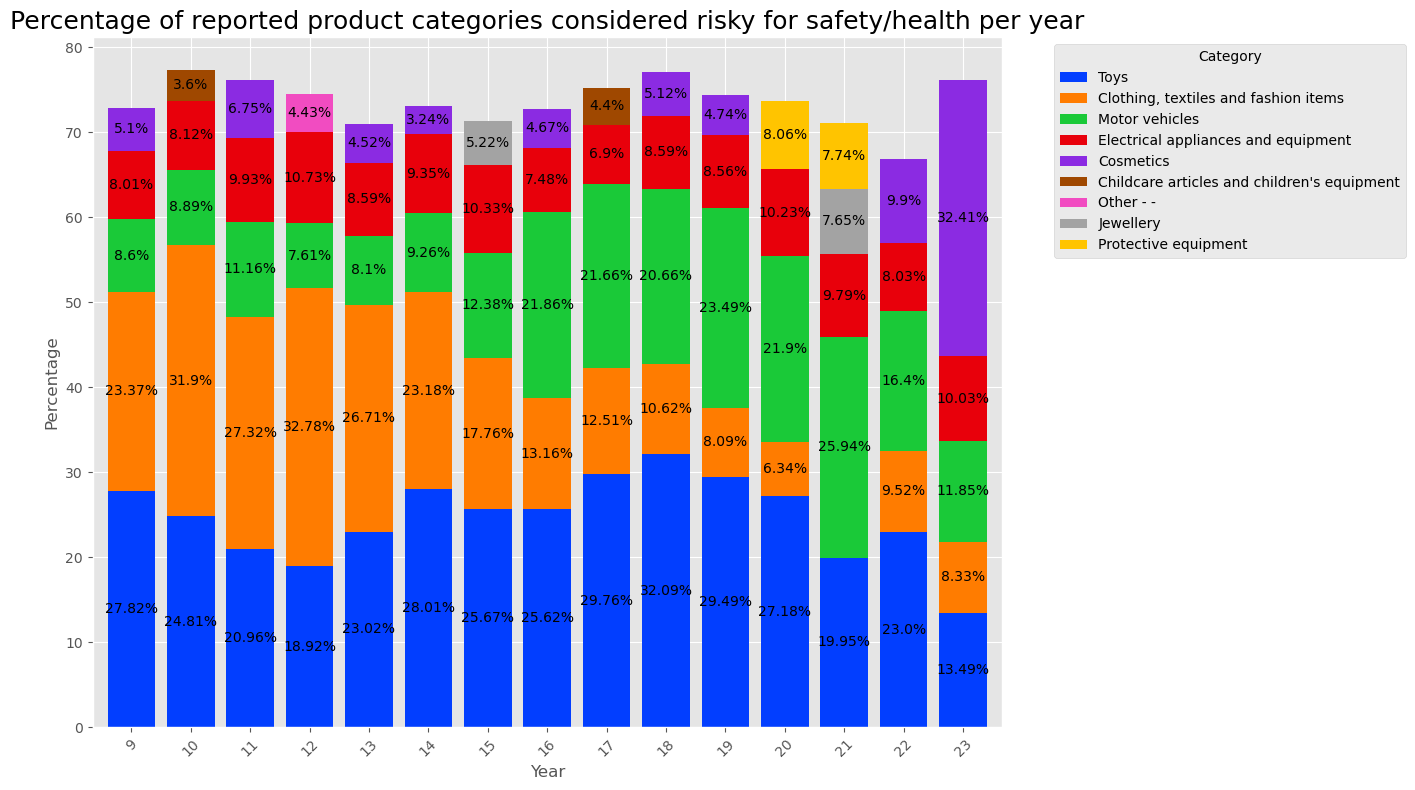

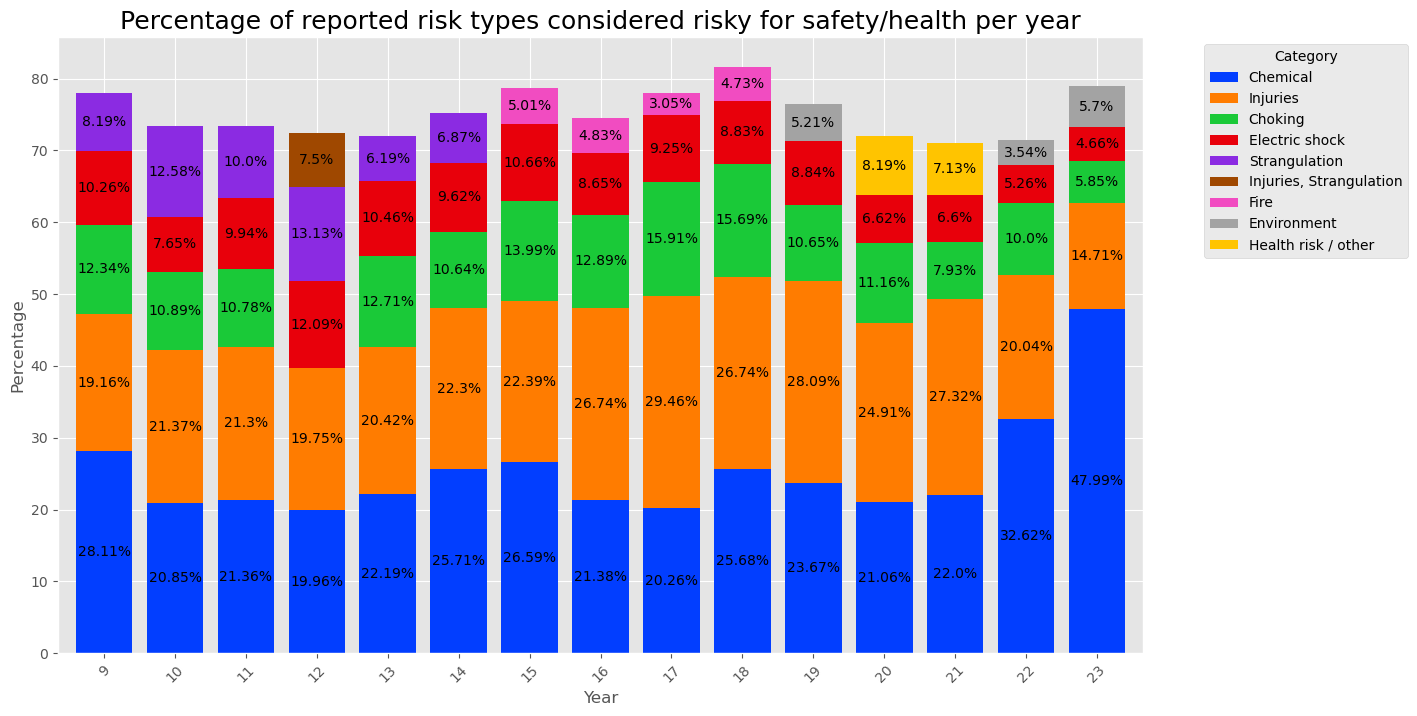

In [31]:
palette = sns.color_palette("bright")

ax = top_5_product_categories_recent_df.plot(kind='bar', figsize=(14, 8), width=0.8, stacked=True,color=palette)
plt.title('Percentage of reported product categories considered risky for safety/health per year',fontsize=18)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [str(round(v.get_height(),ndigits=2))+"%" if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

ax = top_5_risk_types_recent_df.plot(kind='bar', figsize=(14, 8), width=0.8, stacked=True,color=palette)
plt.title('Percentage of reported risk types considered risky for safety/health per year',fontsize=18)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [str(round(v.get_height(),ndigits=2))+"%" if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

In [34]:
#average percentage for toy alerts
print("Average percentage of Toy alerts per year: "+str(round(top_5_product_categories_recent.xs('Toys', level=1).mean(),ndigits=2)))

#average percentage for choking and electric shock risks
print("Average percentage of choking and electric shock risks per year: "+str(round(top_5_risk_types_recent.xs('Choking', level=1).mean()+top_5_risk_types_recent.xs('Electric shock', level=1).mean(),ndigits=2)))

#average percentage for injury risks
print("Average percentage of injury risks per year: "+str(round(top_5_risk_types_recent.xs('Injuries', level=1).mean(),ndigits=2)))

#average percentage for chemical risks
print("Average percentage of chemical risks per year: "+str(round(top_5_risk_types_recent.xs('Chemical', level=1).mean(),ndigits=2)))


Average percentage of Toy alerts per year: 24.65
Average percentage of injury risks per year: 22.98
Average percentage of chemical risks per year: 25.3
Average percentage of choking and electric shock risks per year: 20.16


We visualized the data for the 15 most recent years due to cluttering of the visualizations. 15 years is also often a large enough time frame to observe both economic expansion and recession, which could be relevant when we're dealing with data from different products. In different times different products might be popular, thus produced more, thus also possibly reported more often (which could lead to overproportionate representation within our dataset when considered out of context). We also observed that roughly in the last 15-20 years the majority of all reports were made. We do not want to clutter the visualizations too much, so another reason to limit ourselves to a time span of 15 years.

#### Product categories
In the last two years there has been a large increase of alerts reported for cosmetics from 9.9% to 32.41%. In previous years it wasn't even in the top 5 and barely hit 5%. This could be due to increase in regulation and awareness or possible growth of the industry. It is not really clear what the precise reason is, but an interesting finding at the very least.

Toys are often badly represented within this data. On average they are represented by 24.65% of the total amount of reports per year and there seems to be no signs of decrease. Since toys are use by children it is possible that parents are much more aware of the quality of these products and thus also of the risks involved with materials composing the products. This could possibly lead to a higher rate of alerts reported compared to other products, even though thethese products are not necessarily more risky by nature.

Clothing, textiles, and fashion items have seen a steady in percentual reports. This could be due to inlfuencers on social media promoting expensive brands and higher quality clothing. It is also possible that a change of culture where people aim more for higher quality, more durable, and more eco friendly options.

Motor vehicles have seen an increase in representation within the data. There could be multiple reasons, one of them being the increase in popularity of electric vehicles and more technologically advanced vehicles. Electric vehicles are newer and their technology is less developed than decades old fossil fuel vehicles. Also more and more vehicles incorporate computers and AI within their cars, but since this is all new technology it could lead to more safety concerns.

#### Risk types
ELectric shocks and choking are, similarly to toys, always strongly represented within the top 5 most reported alerts. Adding the averages of these two we come to a value of 20.16%, which is not that far from the 24.65% for toy alerts. 

Chemical risks have always been largely represented within the alerts (25.3% on average), but they have seen a steep increase in the last two years. We observed previously that there has been a large increase in reports for cosmetics in the past two years, with the representation even tripling in 2023 compared to 2021. Alerts for cosmetics are often chemical and thus related to the steep increase of chemical alerts reported in the past two years.

Taking into consideration that motor vehicles and protective equipment have seen a relatively large representation within the alerts, it is not entirely surprising that injuries are also often largely represented within the data won average being 22.98% for the last 15 years. In the visualization it can be observed that just between 2016 and 2021 there was an even larger percentage of alerts refering to risk for injuries. Alerts for motor vehicles have also seen an increase in this period, so these follow similar patterns. Toys are also able to cause injuries, so these could also contribute to these type of alert.

In 2020 and 2021 we have seen a sudden health risk / other contribute 7.66% on average to the risk type alerts. These are also the years where we suddenly observe an average of 7.9% submissions of alerts for protective equipment. 


---
## 3: Exploring the Distribution of Alerts per country

The previous analysis includes all alerts across the EU. We would also like to conduct some analysis on the country level.

## Question 3a

We will focus on two fields, the ``Alert submitted by`` (that is the notifying country and should be within the EU+ region, i.e. the EU countries plus Iceland, Switzerland etc.)) and the ``Country of origin`` (that is the country of origin of the product, could be anywhere in the world).

You are asked to construct two plots:
(a) one that shows which countries are submitting most alerts (ordered). Use relative frequencies (i.e. %) instead of the actual number of alerts
(b) one that shows the top-25 countries that unsafe products have as origin. Again, use relative frequencies. 

Comment on your findings.

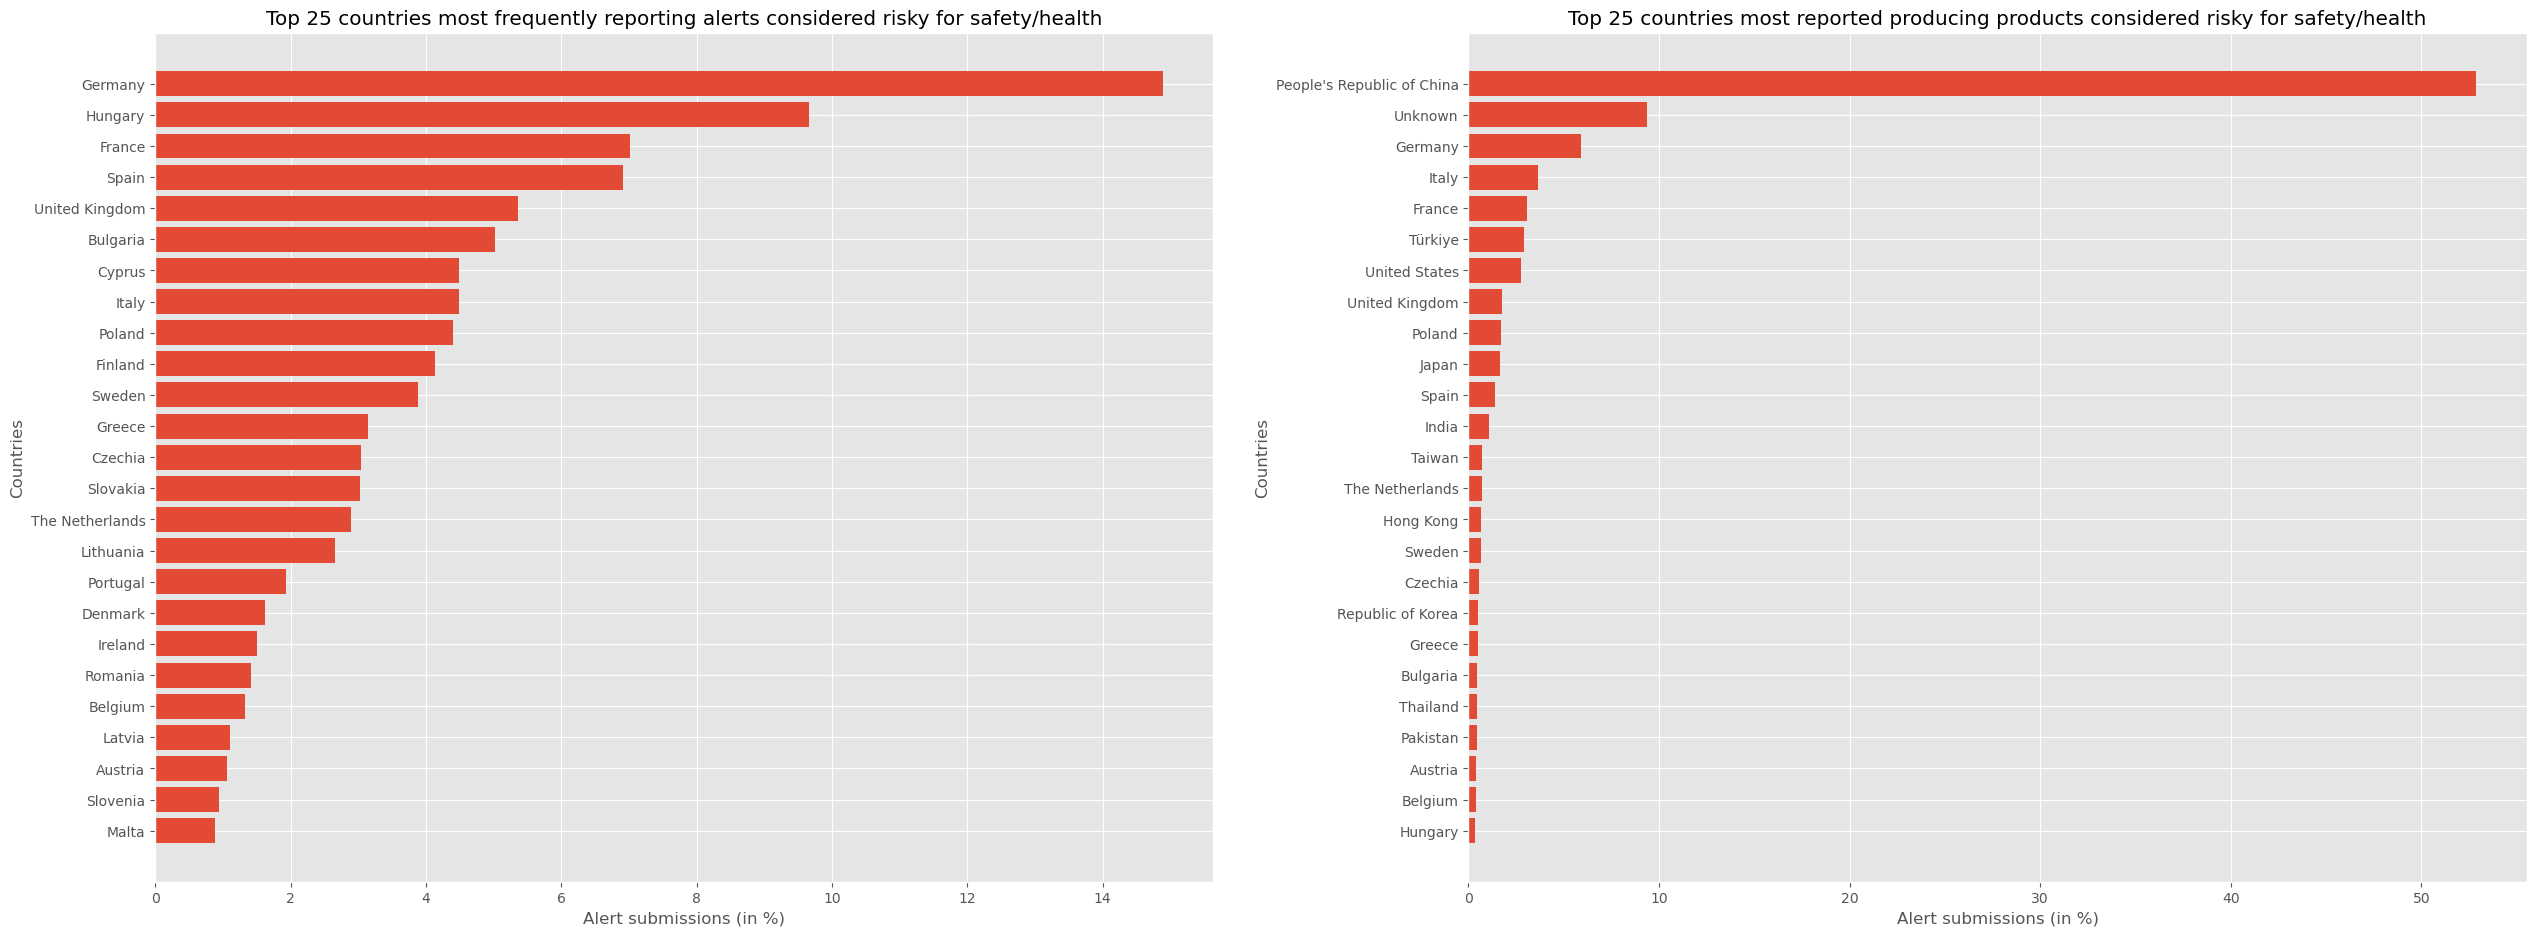

In [57]:
#code for 3a goes here

# Plot top countries submitting most alerts
def plot_3a():
    
    plt.style.use('ggplot')

    fig, subfigs = plt.subplots(1, 2, figsize=(26, 10))

    alert_submitted_by_counts = df_inspected_variables["Alert submitted by"].value_counts()
    alert_submitted_by_counts = (100*alert_submitted_by_counts/alert_submitted_by_counts.sum()).head(25)
    subfigs[0].barh(alert_submitted_by_counts.index, alert_submitted_by_counts.values)
    subfigs[0].invert_yaxis()
    subfigs[0].set_title("Top 25 countries most frequently reporting alerts considered risky for safety/health")
    subfigs[0].set_xlabel("Alert submissions (in %)")
    subfigs[0].set_ylabel("Countries")

    #Plot distribution of country of origin using 
    country_of_origin = df_inspected_variables["Country of origin"].value_counts()
    country_of_origin = (100*country_of_origin/country_of_origin.sum()).head(25)
    subfigs[1].barh(country_of_origin.index, country_of_origin.values)
    subfigs[1].invert_yaxis()
    subfigs[1].set_title("Top 25 countries most reported producing products considered risky for safety/health")
    subfigs[1].set_xlabel('Alert submissions (in %)')
    subfigs[1].set_ylabel('Countries')

    
    #fig.suptitle('Distributions of alert submission data for products considered risky for safety/health', fontsize=30)
    fig.tight_layout(pad=3)
    plt.show()

plot_3a()


This question is already largely dealt with in 1a, but we'll expand slightly.

#### Alert submitted by
As already mentioned in it seems that Germany is responsible for about 14.9%, and Hungary 9.7% of the total amount of alerts submitted. Germany is a country known for their punctuality, safety regulations, and engineering. They are also heavy producers and have one of the largest GDP's in the world. In addition, the population is also highly educated and heavily informed about product safety and regulations. Germany has a culture of unions for workers and a strong worker culture who are all strongly supported by the government. These all combined result in to a diverse and extensive market preserving high standards for production and consumption. This is thus one of the reasons why Germany is represented in the data. Although Hungary is not particularly known for their safety standards, they are part of the European union and their markets are highly controlled by the current government and right-wing prime minister Viktor Orban. They were one of the first countries to completely ban vapes and have one of the harshest drug policies. Their strongly intervening government might be one of the reasons why they are also so highly represented within the data. Other countries up high are all not necessarily known for their high safety standards for products, but they also have large economies and international trade (especially true for island like Cyprus), possibly resulting in more alerts. 

#### Country of origin
As mentioned before, China doesn't particularly have the best reputation with regards to producing quality products. The term "made in China" gets thrown around a lot. It comes to no suprise they are also responsible for producing around 52.9% of the products that were reported. However, we have to take into consideration the fact that china is the largest manufacturing country in the world by far. Germany is also not surprising, since they are the largest manufacturer of products in Europe, have the largest economy in Europe, and are huge exporters too. They are also part of the EU and intensively trade between neighbouring countries. Even though Germany is focussed on high safety standards for their products, considering they are such large exporters it is logical there are also more products originating from Germany in the alerts by sheer chance.

## Question 3b

We will now investigate the field ``Products were found and measures were taken also in``. This field refers to other countries that took measures as well after the reporting alerts. This field might contain multiple country names separated by ``,``, therefore in order to see which are the top-countries that have used the Safety Gate Alert system to identify unsafe products in their juristiction, we would need a new dataframe. Feel free to use another way.

Your new dataframe, should be indexed by the country name (based on the countries that have submitted alerts) and then feature 2 columns: the first one containing the total number of alerts that the country has submitted to Safety Gate and the second one containing the number of times this country took additional measures because of some alert.

Is there any relation between the number of alerts that a country is submitting and the number of cases that they have investigated because of the alerts? Comment on your findings.

In [20]:
#code for 3b goes here


*** fancy answer goes here ***

### Question 4a. Compute Something Interesting

Play with the data and try to compute something interesting about the data. Please try to use at least one of groupby, pivot, or merge (or all of the above).  

Please show your work in the cell below and describe in words what you found in the same cell. This question will be graded leniently but good solutions may be used to create future clinics.

#### Grading ####

Since the question is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4 points): Uses a combination of pandas operations (such as groupby, pivot, merge) to answer a relevant question about the data. The text description provides a reasonable interpretation of the result.
- **Passing** (1-3 points): Computation is flawed or very simple. The text description is incomplete but makes some sense.
- **Unsatisfactory** (0 points): No computation is performed, or a computation with completely wrong results.


***Put your code in one cell below and your explanation in a markdown cell below***

In [21]:
#your code for 4a

*** explanation goes here ***


### Question 4b. Create some more cool visualizations!

Play with the data, and try to produce some visualizations to answer one question that you find interesting regarding the data. You might want to use `merge`/`groupby`/`pivot` to process the data before creating visualizations.

Please show your work in the cells below (feel free to use extra cells if you want), and describe in words what you found. This question will be graded leniently, but good solutions may be used to create future clinic problems. 


#### Grading ####

Since the question is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4 points): The chart is well designed, and the data computation is correct. The text written articulates a reasonable metric and correctly describes the relevant insight and answer to the question you are interested in.
- **Passing** (1-3 points): A chart is produced but with some flaws such as bad encoding. The text written is incomplete but makes some sense.
- **Unsatisfactory** (0 points): No chart is created, or a chart with completely wrong results.

You should have the following in your answers:
* a few visualizations; Please limit your visualizations to 5 plots.
* a few sentences (not too long please!)

***Put your code in one cell below and your explanation in a markdown cell below***

In [22]:
#your code for 4b

*** explanation goes here ***



---
## 5: Recommendations for the EC & Concluding Remarks

### Question 5a

Considering the insights derived from your analysis, what recommendations would you propose to the European Commission regarding enhancements to the Safety Gate portal/database? Each recommendation should be underpinned by the findings derived from the examination of plots, statistics and observations. Take into account aspects such as missing data, variable distributions (e.g., evaluating the utility of variables with limited values), and potential enhancements in data representation or transformation.

### Question 5b

In a concise summary of your analysis outcomes, address the implications for relevant stakeholders. How does this analysis impact: (a) consumers, (b) companies and (c) regulatory authorities, such as national consumer protection agencies or the European Commission itself? Additionally, consider potential misuse of the dataset (and any subsequent analyses) by individuals or entities. If you identify such risks, propose ways to mitigate them.